In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

path='gdrive/MyDrive/evaluation InContextLearning2024'

import sys
sys.path.append('/content/'+path)


Mounted at /content/gdrive


In [2]:
%cd 'evaluation InContextLearning2024'

[Errno 2] No such file or directory: 'evaluation InContextLearning2024'
/content


In [9]:
! ls

environment.yaml  src


In [1]:
from eval.eval import basic_eval
from models.linear import LeastSquaresModel
from models.zero_model import ZeroModel
from function_classes.linear import LinearRegression

from torch.distributions.normal import Normal
import torch

from torch import nn


from torch import normal

/home/codespace/.python/current/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
m = Normal(torch.zeros((4, 100, 10)), torch.ones((4, 100 ,10))) #batch size, sequence_length, x_dim

config_data={'function_class':LinearRegression(m), "accuracy_func": nn.MSELoss(reduction="none"), "test_size": 10}

evaluation=basic_eval(LeastSquaresModel(), config_data=config_data)

print(basic_eval(ZeroModel(), config_data))

{'accuracy': tensor([ 904.4500, 1113.9211, 1151.4082, 1626.6744, 1205.3057, 1008.9330,
         909.9576,  691.8312, 1354.3584, 1439.2903, 1425.9995,  953.2568,
         810.9221, 1357.2457, 1210.8695,  712.8323,  718.1384, 1248.8555,
         919.6305,  832.4180, 1733.6838,  984.2390, 1019.9445,  946.7543,
         692.0314, 1249.7379, 1170.2083, 1095.2740,  851.8742,  956.1167,
        1177.1859, 1711.7836, 1420.0361, 1194.6747, 1405.9642,  628.7925,
        1132.7496, 1058.7064, 1212.2532,  778.0729, 1481.4082,  898.1672,
        1340.0352, 1112.0127, 1557.7776,  997.2310,  996.5292,  993.8882,
         847.4003,  901.9344,  836.6307,  875.1581,  995.6445, 1537.1711,
        1251.9086,  631.4554, 1170.3289, 1188.9817, 1043.0413, 1089.3246,
         968.1891,  809.9019,  973.7838, 1461.4515,  490.1538, 1141.6335,
        1162.0215,  924.3763, 1288.2849, 1275.1698,  762.0256, 1330.8665,
        1009.8789,  635.8427, 1147.0828, 1034.9104, 1494.7610,  805.4716,
         870.1227,  720.6

dict_keys(['accuracy', 'std', 'std_mean', 'max', 'min', 'quantile0.01', 'quantile0.05', 'quantile0.1', 'quantile0.25', 'quantile0.5', 'quantile0.75', 'quantile0.9', 'quantile0.95', 'quantile0.99'])


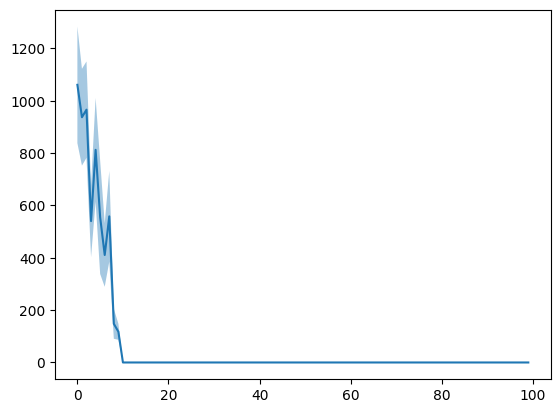

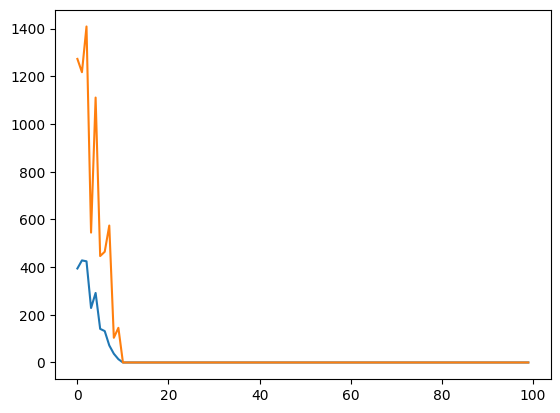

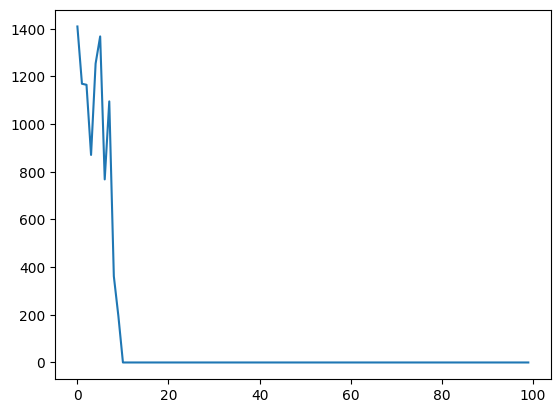

In [3]:
import matplotlib.pyplot as plt

import numpy as np

print(evaluation.keys())

plt.plot(evaluation.get("accuracy"))

plt.fill_between(range(len(evaluation.get("accuracy"))), evaluation.get("accuracy")-evaluation.get("std_mean"), evaluation.get("accuracy")+evaluation.get("std_mean"), alpha=0.4)

plt.show()

plt.plot(evaluation.get("quantile0.5") )

plt.plot(evaluation.get("quantile0.75"))

plt.show()

plt.plot(evaluation.get("std"))